In [1]:
import numpy as np
import pandas as pd
from scipy.io import loadmat
import matplotlib.pyplot as plt

In [2]:
import sys
sys.path.append(r"C:\Users\yangshanqi\Documents\lab\labgithubcopy\task_1_version_2")

In [3]:
from kNN_function import kNN_k_parameter_adjust
from kNN_function import kNN_data_ratio_adjust
from kNN_function import kNN_data_ratio_adjust_2
from kNN_function import kNN_k_parameter_adjust_with_bisaes_data
from plot_prediction import kNN_plot_prediction

In [4]:
X_scaled_FCNN=pd.read_csv("C:\\Users\\yangshanqi\\Documents\\lab\\labgithubcopy\\task_1_version_2\\result\\X_scaled_FCNN.csv")
y_scaled_FCNN=pd.read_csv("C:\\Users\\yangshanqi\\Documents\\lab\\labgithubcopy\\task_1_version_2\\result\\y_scaled_FCNN.csv")
X_scaled_CNN=pd.read_csv("C:\\Users\\yangshanqi\\Documents\\lab\\labgithubcopy\\task_1_version_2\\result\\X_scaled_CNN.csv")
y_scaled_CNN=pd.read_csv("C:\\Users\\yangshanqi\\Documents\\lab\\labgithubcopy\\task_1_version_2\\result\\y_scaled_CNN.csv")
X_scaled_kMeans=pd.read_csv("C:\\Users\\yangshanqi\\Documents\\lab\\labgithubcopy\\task_1_version_2\\result\\X_scaled_kMeans.csv")
y_scaled_kMeans=pd.read_csv("C:\\Users\\yangshanqi\\Documents\\lab\\labgithubcopy\\task_1_version_2\\result\\y_scaled_kMeans.csv")
X_val=pd.read_csv("C:\\Users\\yangshanqi\\Documents\\lab\\labgithubcopy\\task_1_version_2\\result\\scaled_validation_feature.csv")
y_val=pd.read_csv("C:\\Users\\yangshanqi\\Documents\\lab\\labgithubcopy\\task_1_version_2\\result\\validation_label.csv")
X_scaled_kMeans=X_scaled_kMeans.drop("predict_cluster",1)
y_scaled_kMeans=y_scaled_kMeans.drop("predict_cluster",1)
X_val=X_val.drop("Unnamed: 0",1)
y_val=y_val.drop("Unnamed: 0",1)
X_scaled=pd.read_csv("C:\\Users\\yangshanqi\\Documents\\lab\\labgithubcopy\\task_1_version_2\\result\\scaled_train_feature.csv")
y_scaled=pd.read_csv("C:\\Users\\yangshanqi\\Documents\\lab\\labgithubcopy\\task_1_version_2\\result\\train_label.csv")

In [5]:
input_data_amount=pd.DataFrame({"raw_only_scaled":[len(X_scaled)],"raw_scaled_kMeans":[len(X_scaled_kMeans)],"raw_scaled_CNN":[len(X_scaled_CNN)],"raw_scaled_FCNN":[len(X_scaled_FCNN)]})
input_data_amount.rows=['amount']

In [6]:
input_data_amount

,raw_only_scaled,raw_scaled_CNN,raw_scaled_FCNN,raw_scaled_kMeans
0,355455,86412,89524,269384


# In this part, function kNN_data_ratio_adjust is used with k=100. Label1 : Label2 chages from 2 to 0.5.#

In [5]:
kNN_scaled_FCNN_result_data_ratio=kNN_data_ratio_adjust(X_scaled_FCNN,y_scaled_FCNN,X_val,y_val,100)

the total executing time:  6.9minute


In [6]:
kNN_scaled_CNN_result_data_ratio=kNN_data_ratio_adjust(X_scaled_CNN,y_scaled_CNN,X_val,y_val,100)

the total executing time:  6.6minute


In [10]:
kNN_scaled_kMeans_result_data_ratio=kNN_data_ratio_adjust(X_scaled_kMeans,y_scaled_kMeans,X_val,y_val,100)

the total executing time:  6.8minute


In [11]:
kNN_scaled_result_data_ratio=kNN_data_ratio_adjust(X_scaled,y_scaled,X_val,y_val,100)

the total executing time:  7.2minute


In [22]:
#k=100, kNN_data_ratio_adjust
kNN_scaled_FCNN_result_data_ratio.to_csv("C:\\Users\\yangshanqi\\Documents\\lab\\labgithubcopy\\task_1_version_2\\result\\kNN_scaled_FCNN_result_data_ratio.csv",index=True)
kNN_scaled_CNN_result_data_ratio.to_csv("C:\\Users\\yangshanqi\\Documents\\lab\\labgithubcopy\\task_1_version_2\\result\\kNN_scaled_CNN_result_data_ratio.csv",index=True)
kNN_scaled_kMeans_result_data_ratio.to_csv("C:\\Users\\yangshanqi\\Documents\\lab\\labgithubcopy\\task_1_version_2\\result\\kNN_scaled_kMeans_result_data_ratio.csv",index=True)
kNN_scaled_result_data_ratio.to_csv("C:\\Users\\yangshanqi\\Documents\\lab\\labgithubcopy\\task_1_version_2\\result\\kNN_scaled_result_data_ratio.csv",index=True)

In [9]:
kNN_scaled_FCNN_result_data_ratio=pd.read_csv("C:\\Users\\yangshanqi\\Documents\\lab\\labgithubcopy\\task_1_version_2\\result\\kNN_scaled_FCNN_result_data_ratio.csv")
kNN_scaled_CNN_result_data_ratio=pd.read_csv("C:\\Users\\yangshanqi\\Documents\\lab\\labgithubcopy\\task_1_version_2\\result\\kNN_scaled_CNN_result_data_ratio.csv")
kNN_scaled_kMeans_result_data_ratio=pd.read_csv("C:\\Users\\yangshanqi\\Documents\\lab\\labgithubcopy\\task_1_version_2\\result\\kNN_scaled_kMeans_result_data_ratio.csv")
kNN_scaled_result_data_ratio=pd.read_csv("C:\\Users\\yangshanqi\\Documents\\lab\\labgithubcopy\\task_1_version_2\\result\\kNN_scaled_result_data_ratio.csv")

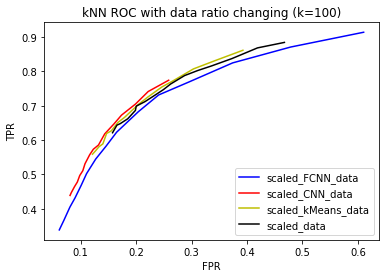

In [10]:
plt.title("kNN ROC with data ratio changing (k=100)")
plt.plot(kNN_scaled_FCNN_result_data_ratio['FPR'],kNN_scaled_FCNN_result_data_ratio['TPR'],"b-",label='scaled_FCNN_data')
plt.plot(kNN_scaled_CNN_result_data_ratio['FPR'],kNN_scaled_CNN_result_data_ratio['TPR'],"r-",label='scaled_CNN_data')
plt.plot(kNN_scaled_kMeans_result_data_ratio['FPR'],kNN_scaled_kMeans_result_data_ratio['TPR'],"y-",label='scaled_kMeans_data')
plt.plot(kNN_scaled_result_data_ratio['FPR'],kNN_scaled_result_data_ratio['TPR'],"k-",label='scaled_data')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.show()

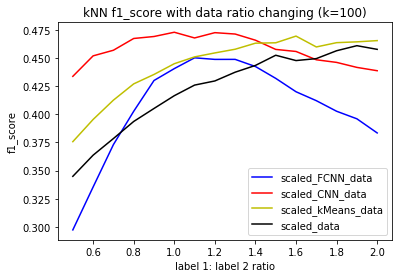

In [11]:
plt.title("kNN f1_score with data ratio changing (k=100)")
plt.plot(kNN_scaled_FCNN_result_data_ratio['label 1: label 2 ratio'],kNN_scaled_FCNN_result_data_ratio['f1_score'],"b-",label='scaled_FCNN_data')
plt.plot(kNN_scaled_CNN_result_data_ratio['label 1: label 2 ratio'],kNN_scaled_CNN_result_data_ratio['f1_score'],"r-",label='scaled_CNN_data')
plt.plot(kNN_scaled_kMeans_result_data_ratio['label 1: label 2 ratio'],kNN_scaled_kMeans_result_data_ratio['f1_score'],"y-",label='scaled_kMeans_data')
plt.plot(kNN_scaled_result_data_ratio['label 1: label 2 ratio'],kNN_scaled_result_data_ratio['f1_score'],"k-",label='scaled_data')
plt.xlabel('label 1: label 2 ratio')
plt.ylabel('f1_score')
plt.legend()
plt.show()

# In this part, function kNN_data_ratio_adjust_2 is used with k=100. Label1 : Label2 chages from 5 to 0.5. #

In [21]:
len(y_scaled[y_scaled['label']==1])/len(y_scaled[y_scaled['label']==2])

5.6180413330850865

In [18]:
len(y_scaled['label']==2)

355455

In [6]:
kNN_scaled_FCNN_result_data_ratio_2=kNN_data_ratio_adjust_2(X_scaled_FCNN,y_scaled_FCNN,X_val,y_val,100)
kNN_scaled_CNN_result_data_ratio_2=kNN_data_ratio_adjust_2(X_scaled_CNN,y_scaled_CNN,X_val,y_val,100)
kNN_scaled_kMeans_result_data_ratio_2=kNN_data_ratio_adjust_2(X_scaled_kMeans,y_scaled_kMeans,X_val,y_val,100)
kNN_scaled_result_data_ratio_2=kNN_data_ratio_adjust_2(X_scaled,y_scaled,X_val,y_val,100)

the total executing time:  2.8minute
the total executing time:  2.8minute
the total executing time:  2.9minute
the total executing time:  2.8minute


In [9]:
#k=100, kNN_data_ratio_adjust_2
kNN_scaled_FCNN_result_data_ratio_2.to_csv("C:\\Users\\yangshanqi\\Documents\\lab\\labgithubcopy\\task_1_version_2\\result\\kNN_scaled_FCNN_result_data_ratio_2.csv",index=True)
kNN_scaled_CNN_result_data_ratio_2.to_csv("C:\\Users\\yangshanqi\\Documents\\lab\\labgithubcopy\\task_1_version_2\\result\\kNN_scaled_CNN_result_data_ratio_2.csv",index=True)
kNN_scaled_kMeans_result_data_ratio_2.to_csv("C:\\Users\\yangshanqi\\Documents\\lab\\labgithubcopy\\task_1_version_2\\result\\kNN_scaled_kMeans_result_data_ratio_2.csv",index=True)
kNN_scaled_result_data_ratio_2.to_csv("C:\\Users\\yangshanqi\\Documents\\lab\\labgithubcopy\\task_1_version_2\\result\\kNN_scaled_result_data_ratio_2.csv",index=True)

In [12]:
kNN_scaled_FCNN_result_data_ratio_2=pd.read_csv("C:\\Users\\yangshanqi\\Documents\\lab\\labgithubcopy\\task_1_version_2\\result\\kNN_scaled_FCNN_result_data_ratio_2.csv")
kNN_scaled_CNN_result_data_ratio_2=pd.read_csv("C:\\Users\\yangshanqi\\Documents\\lab\\labgithubcopy\\task_1_version_2\\result\\kNN_scaled_CNN_result_data_ratio_2.csv")
kNN_scaled_kMeans_result_data_ratio_2=pd.read_csv("C:\\Users\\yangshanqi\\Documents\\lab\\labgithubcopy\\task_1_version_2\\result\\kNN_scaled_kMeans_result_data_ratio_2.csv")
kNN_scaled_result_data_ratio_2=pd.read_csv("C:\\Users\\yangshanqi\\Documents\\lab\\labgithubcopy\\task_1_version_2\\result\\kNN_scaled_result_data_ratio_2.csv")

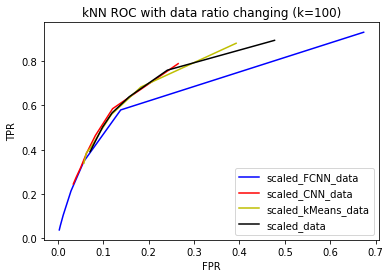

In [13]:
plt.title("kNN ROC with data ratio changing (k=100)")
plt.plot(kNN_scaled_FCNN_result_data_ratio_2['FPR'],kNN_scaled_FCNN_result_data_ratio_2['TPR'],"b-",label='scaled_FCNN_data')
plt.plot(kNN_scaled_CNN_result_data_ratio_2['FPR'],kNN_scaled_CNN_result_data_ratio_2['TPR'],"r-",label='scaled_CNN_data')
plt.plot(kNN_scaled_kMeans_result_data_ratio_2['FPR'],kNN_scaled_kMeans_result_data_ratio_2['TPR'],"y-",label='scaled_kMeans_data')
plt.plot(kNN_scaled_result_data_ratio_2['FPR'],kNN_scaled_result_data_ratio_2['TPR'],"k-",label='scaled_data')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.show()

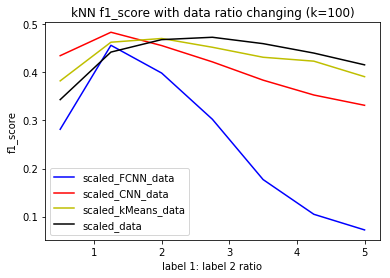

In [14]:
plt.title("kNN f1_score with data ratio changing (k=100)")
plt.plot(kNN_scaled_FCNN_result_data_ratio_2['label 1: label 2 ratio'],kNN_scaled_FCNN_result_data_ratio_2['f1_score'],"b-",label='scaled_FCNN_data')
plt.plot(kNN_scaled_CNN_result_data_ratio_2['label 1: label 2 ratio'],kNN_scaled_CNN_result_data_ratio_2['f1_score'],"r-",label='scaled_CNN_data')
plt.plot(kNN_scaled_kMeans_result_data_ratio_2['label 1: label 2 ratio'],kNN_scaled_kMeans_result_data_ratio_2['f1_score'],"y-",label='scaled_kMeans_data')
plt.plot(kNN_scaled_result_data_ratio_2['label 1: label 2 ratio'],kNN_scaled_result_data_ratio_2['f1_score'],"k-",label='scaled_data')
plt.xlabel('label 1: label 2 ratio')
plt.ylabel('f1_score')
plt.legend()
plt.show()

# Because during the analysis before, it is easy to find that the data processed with CNN peforms better. So in this part, we keep the dataset CNN and choose label1:label2=1.1. Then try to observe the situation with k increasing. #


In [5]:
kNN_scaled_CNN_result_kValue=kNN_k_parameter_adjust_with_bisaes_data (X_scaled_CNN,y_scaled_CNN,X_val,y_val,1.1)

the total executing time: 15.3minute


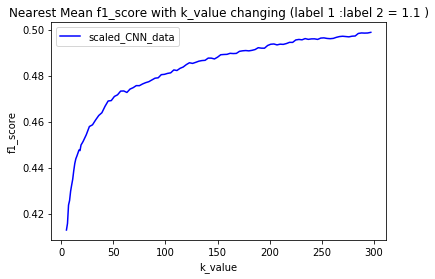

In [6]:
plt.title("kNN f1_score with k_value changing (label 1 :label 2 = 1.1 )")
plt.plot(kNN_scaled_CNN_result_kValue['k_value'],kNN_scaled_CNN_result_kValue['f1_score'],"b-",label='scaled_CNN_data')
plt.ylabel('f1_score')
plt.xlabel('k_value')
plt.legend()
plt.show()

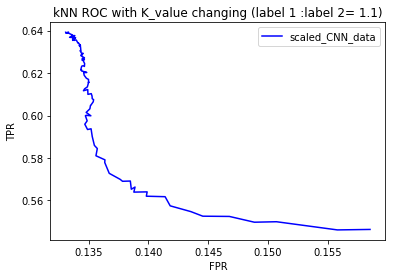

In [15]:
plt.title("kNN ROC with K_value changing (label 1 :label 2= 1.1)")
plt.plot(kNN_scaled_CNN_result_kValue['FPR'],kNN_scaled_CNN_result_kValue['TPR'],"b-",label='scaled_CNN_data')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.show()

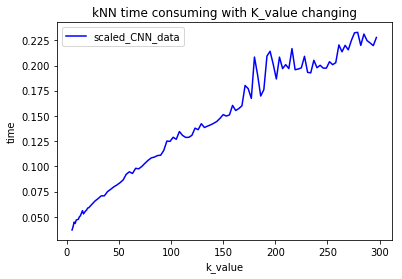

In [16]:
plt.title("kNN time consuming with K_value changing")
plt.plot(kNN_scaled_CNN_result_kValue['k_value'],kNN_scaled_CNN_result_kValue['time'],"b-",label='scaled_CNN_data')
plt.xlabel('k_value')
plt.ylabel('time')
plt.legend()
plt.show()

In [7]:
kNN_scaled_CNN_result_kValue.to_csv("C:\\Users\\yangshanqi\\Documents\\lab\\labgithubcopy\\task_1_version_2\\result\\kNN_scaled_CNN_result_kValue.csv",index=True)

In [8]:
kNN_scaled_CNN_result_kValue

,k_value,f1_score,TPR,FPR,BER,time
0,5,0.412904,0.546372,0.158528,0.306078,0.036949
1,6,0.415742,0.546145,0.155799,0.304827,0.040252
2,7,0.423761,0.550000,0.150702,0.300351,0.044774
3,8,0.425724,0.549773,0.148856,0.299541,0.043473
4,9,0.429794,0.552494,0.146764,0.297135,0.046824
5,10,0.432456,0.552608,0.144542,0.295967,0.047237
6,11,0.434953,0.554762,0.143546,0.294392,0.047453
7,12,0.438685,0.557483,0.141814,0.292165,0.049966
8,13,0.441839,0.561791,0.141389,0.289799,0.051016
9,14,0.443877,0.562018,0.139821,0.288901,0.053619


# plot prediction of kNN #

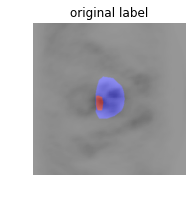

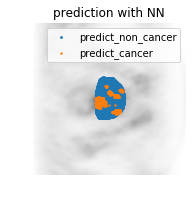

In [5]:
stuck,slices,features=11,22,3
kNN_plot_prediction(stuck,slices,features,X_scaled_CNN,y_scaled_CNN,X_val,y_val,200,1.1)